In [2]:
import pandas as pd
from pandas_datareader import data, wb # This will import the data reader
import weightedcalcs as wc
import numpy as np

import matplotlib.pyplot as plt

fig_path = "C:\\Users\\mwaugh.NYC-STERN\\Documents\\GitHub\\EGB\\materials\\figures"

In [4]:
codes = ["CIVPART" ,"UNRATE"] 
# nomial gdp, imports, imports from china, constant maturity 1 year rate, cip (no energy or food)

fred = data.DataReader(codes,"fred",1990)  # Then for fred, you hand it the codes
                                            # Tell it you want to ask from FRED
                                            # then tell it the start date

In [5]:
fred.head()

,CIVPART,UNRATE
DATE,,
1990-01-01,66.8,5.4
1990-02-01,66.7,5.3
1990-03-01,66.7,5.2
1990-04-01,66.6,5.4
1990-05-01,66.6,5.4


In [12]:
urate = pd.DataFrame(fred["UNRATE"].resample("Q", convention= 'end').mean())

participation = pd.DataFrame(fred["CIVPART"].resample("Q", convention= 'end').mean())

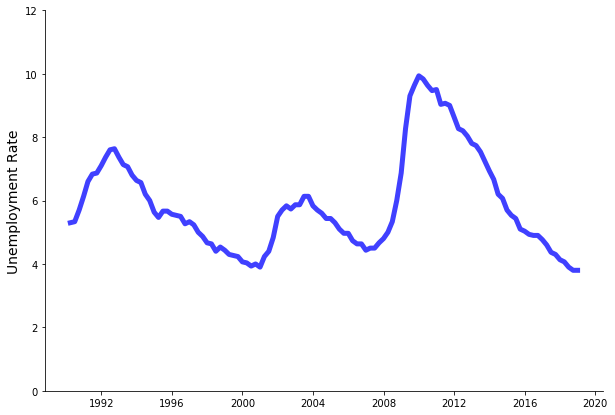

In [20]:
fig, ax = plt.subplots(figsize = (10,7))

ax.plot(urate, color = "blue",
        linewidth = 5, label = "Unemployment", alpha = 0.75)

ax.set_ylabel("Unemployment Rate", fontsize = 14)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

ax.set_ylim(0,12)

plt.savefig(fig_path + "\\unemployment_rate.pdf", bbox_inches = "tight", dip = 3600)

plt.show()

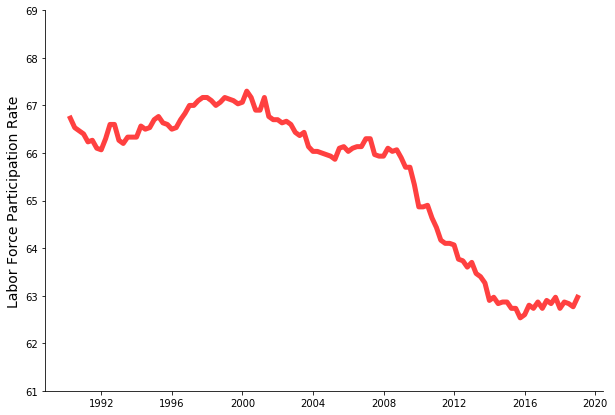

In [22]:
fig, ax = plt.subplots(figsize = (10,7))

ax.plot(participation , color = "red",
        linewidth = 5, label = "Participation", alpha = 0.75)

ax.set_ylabel("Labor Force Participation Rate", fontsize = 14)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

ax.set_ylim(61,69)

plt.savefig(fig_path + "\\participation_rate.pdf", bbox_inches = "tight", dip = 3600)

plt.show()

## Labor's Share (Related to Problem Set \# 1)


In [48]:
codes = ["A033RC1A027NBEA" ,"A041RC1A027NBEA", "GDP"] 
# nomial gdp, imports, imports from china, constant maturity 1 year rate, cip (no energy or food)

fred = data.DataReader(codes,"fred",1970)  # Then for fred, you hand it the codes
                                            # Tell it you want to ask from FRED

The code "A033RC1A027NBEA" is compensation of employess (earnings + benefits). Then the code "A041RC1A027NBEA" is proprietors income, which is tricky as it both reflects labor income (these guys work within the firm), but they are also owners of the firm and are the claiments on the capital stock. 

Here is the breakdown of national income by source:

- [Fred Table](https://fred.stlouisfed.org/release/tables?rid=53&eid=42133&snid=42136)

In [49]:
fred.head()

,A033RC1A027NBEA,A041RC1A027NBEA,GDP
DATE,,,
1970-01-01,623.347,77.803,1051.200
1970-04-01,NaN,NaN,1067.375
1970-07-01,NaN,NaN,1086.059
1970-10-01,NaN,NaN,1088.608
1971-01-01,664.995,83.904,1135.156


In [50]:
fred["labor_share"] = (fred.A033RC1A027NBEA + fred.A041RC1A027NBEA)/ fred.GDP

Here we will define the labor share as labor compensation + all of proprietors income. This will be an upper bound? Another way to do this is to just look at labor compensation...

In [43]:
fred.head()

,A033RC1A027NBEA,A041RC1A027NBEA,GDP,labor_share
DATE,,,,
1970-01-01,623.347,77.803,1051.200,0.667000
1970-04-01,NaN,NaN,1067.375,NaN
1970-07-01,NaN,NaN,1086.059,NaN
1970-10-01,NaN,NaN,1088.608,NaN
1971-01-01,664.995,83.904,1135.156,0.659732


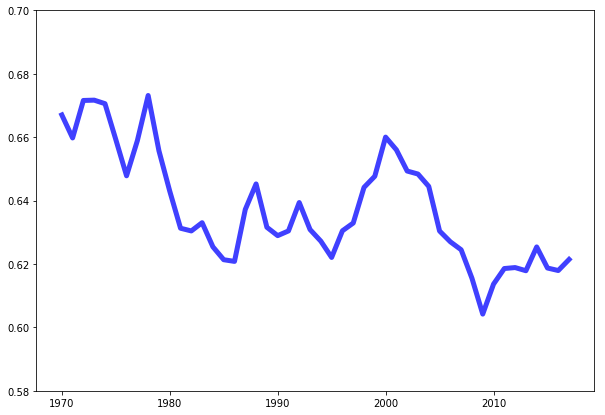

In [47]:
fig, ax = plt.subplots(figsize = (10,7))

ax.plot(fred.dropna().labor_share, color = "blue",
        linewidth = 5, label = "Unemployment", alpha = 0.75)

ax.set_ylim(0.58,0.70)

plt.show()